# 役者前書き
- 本書の翻訳は、株式会社サイバーエージェントにおけるゼミ活動での輪読から始まりました。執筆の担当は、第１章が冨田、第２章が白木、第３章が邊土名、第４章が早川、第５章が河中、第６章が藤田、第７章が安井、第８章が兵頭、第９章・訳者まえがきが加藤、第１０章・謝辞・結論が森脇です。
- 本書のコードは https://mixtape.scunning.com/ 

# Chap. 1 導入
## 1.1 因果推論とは何か
- 理論や制度の詳細に関する深い知識を活用し、ある特定の結果に対する事象や選択の影響を推定すること。
- 本書は、プログラムの例やデータ、詳細な解説がある読みやすい入門書。

## 1.2 相関と因果を混同してはいけない
- 「相関は因果を意味しない」：本書の目的の一つは、特に観察データにおける相関関係の多くが、因果関係を反映しているわけではない理由を、読者に正確に理解してもらうこと。
- 2つの物事の間に因果関係があるのにもかかわらず、観察可能な相関関係がないこともある。
    - 風が吹く中で船のかじをうまく切って湖を一直線に進む船に対して、風(や船)を知らない(観測できない)人が見たら、舵が壊れていると判断してしまう。舵の動きと船の進行方向の間に関係性がないように見えるから。
    - 船乗りが観察されていない風に反応して、舵を内生的に動かしているため、舵の動きと船の進行方向の間には因果関係があるのにもかかわらず、目に見える関係性は相殺されてしまう。
- 相関関係が因果関係を意味することがほとんどないのは、人間が状況に応じて最適な行動をとっていることが主な理由。人間がランダムに行動することは滅多にない。そして、このランダム性の存在こそが因果関係を特定するために重要。
    - 観測された相関関係には、だいたい観測されない人間の行動(=内生性)が存在しているということ？

## 1.3 最適化はすべてを内生化する
- 観察データにおいては、相関はほぼ間違いなく因果関係を反映したものではない。なぜなら、観察データにおける変数は、人々が最善と考える行動を選択して、内生的に決定されたものだから。
- ある相関が因果関係を表すためには、その相関が、今関心のある潜在アウトカムと無関係な選択に基づいている必要がある。しかし、人々が最善と考えることに基づいて何らかの洗濯をしている場合、こうした選択は必然的に潜在アウトカムに基づいているため、因果を表すために必要な条件を全く満たしていない。

## 1.4 例 : 需要の価格弾性力の識別
- 因果推論の考え方を理解するには、比較静学の概念が役に立つ。ceteris paribus, つまり「ほかのものはすべて一定とする」という考えに基づいている。例えば、ある介入の因果効果を記述しようとするとき、私たちはモデル内のほかの変数が変化していないことを仮定する。
- 計量経済モデルの例として、線形需要関数

    $\log Q_d = \alpha + \delta \log P + \gamma X + u$

を考える。$\alpha$は切片、$\delta$は需要の弾性力、$X$はほかの財の価格や所得などの需要決定の行列、$\gamma$は$X, Q_d$の関係を表す係数、$u$は誤差項。
- 需要の価格弾性力を推定するために必要なもの：
    - 価格と量についての多数のデータ
    - データセットの中に、$u$とは独立な価格の変動。このような独立性を「外生性」。

# Chap. 2 確率と回帰の概要
## 2.1 - 2.4
省略

## 2.5 分割表
- 条件付き確率の定義

    $P(A|B) = \frac{P(A,B)}{P(B)}, P(B|A) = \frac{P(A,B)}{P(A)}$

から、以下の式が導ける。

- ベイズルールの単純(naive)な表現

    $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

- ベイズルールのベイズ分解(Bayesian decomposition)

    $P(A|B) = \frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|\sim A)P(\sim A)}$

## 2.6 Monty Hall 問題
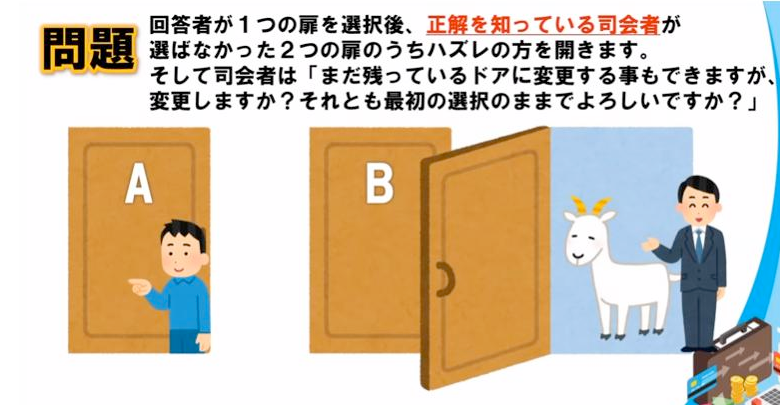
https://cruel.hatenablog.com/entry/2022/10/30/214634

- この問題を確率の表記法で定式化する。ドア$i$が当たりの事象を$A_i$とおくと、

    $P(A_i) = \frac{1}{3}$

    挑戦者はドア1を選んだとして、Montyが選んだドアを2として、ドア2を開ける事象を$B$とおく。このとき、「Monty Hallがドア2を開けたとき(事象B)、ドア1が当たりである(事象$A_1$)確率はどのくらいか？」

    $P(A_1|B) = \frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + P(B|A_3)P(A_3)}$

    ここで、
    - $P(B|A_1) = 0.5$ (二つのドアを選べるから)
    - $P(B|A_2) = 0$ (ドア2は当たりなので選べない)
    - $P(B|A_3) = 1$ (ドア2は当たりなので、ドア3しか選べない)

    したがって
    
    $P(A_1|B) = \frac{0.5 \times \frac{1}{3}}{0.5 \times \frac{1}{3} + 0 \times \frac{1}{3} + 1 \times \frac{1}{3}} = \frac{1}{3}$

    同様に、「Monty Hallがドア2を開けたとき(事象B)、ドア3が当たりである(事象$A_1$)確率はどのくらいか？」

    $P(A_3|B) = \frac{P(B|A_3)P(A_3)}{P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + P(B|A_3)P(A_3)} = \frac{1 \times \frac{1}{3}}{0.5} = \frac{2}{3}$

    よって、ドア3が当たりの確率はドア1が当たりである確率よりも2倍高い！！($P(A_2|B)=0$からも分かる)

- 別解として、挑戦者は最初にドア1を選んだとして、事象$B$を「挑戦者がドアを変えたときに当たる」と定義する。

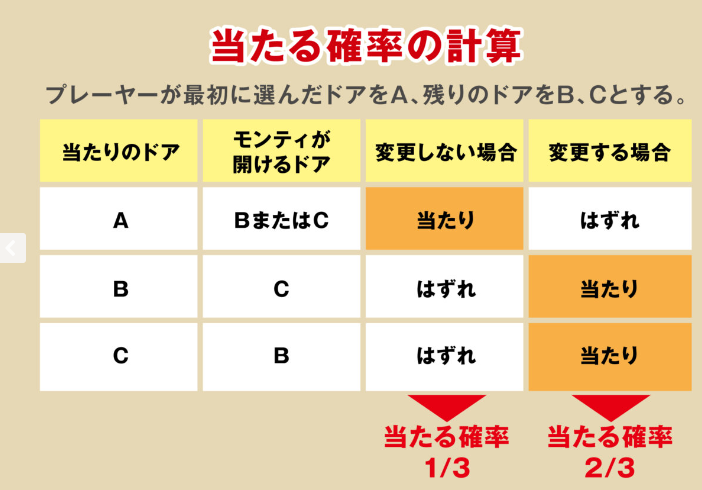
https://otonano-shumatsu.com/images/328889/2
 
 - この場合、知りたい確率は$P(B)$で

    $P(B)=P(B|A_1)P(A_1)+P(B|A_2)P(A_2)+P(B|A_3)P(A_3)=0\cdot\frac{1}{3}+1\cdot\frac{1}{3}+1\cdot\frac{1}{3}=\frac{2}{3}$

    となる。

- 最初の解法では、Monty Hallの選ぶドアも固定しているのに対し、最後の解法では、Monty Hallの選ぶドアを陽に指定していない点が異なっている。
    

## 2.7 - 2.10
省略

# 割り当て
- Chap. 2 小松原
- Chap. 3
- Chap. 4.1
- Chap. 4.2, 4.3
- Chap. 5.1, 5.2
- Chap. 5.3
- Chap. 